In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

np.random.seed(7)
plt.style.use('ggplot')
%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
data = pd.read_csv('data/tweets.csv')
data.head(10)

,Tweets
0,RT @DataFlairWS: 14 Most Used #DataScience Too...
1,RT @chi2innovations: Check out the Top #Data S...
2,RT @KirkDBorne: The 10 #DeepLearning Methods t...
3,RT @martinscerri: Top #DataScience Learning Re...
4,RT @wysetek: Global blog of the week - Datasci...
5,RT @chi2innovations: Check out the Top #Data S...
6,RT @DataFlairWS: 14 Most Used #DataScience Too...
7,RT @MaxCRoser: A new paper provides an overvie...
8,RT @TDHASSN: The project is part of a recent t...
9,Apply Data Science to Pre-owned Auto Markets -...


In [35]:
len(data)

90

In [3]:
data.isna().sum()

Tweets    0
dtype: int64

In [4]:
data['Tweets'].apply(len).describe()

count     90.000000
mean     132.022222
std       20.696294
min       30.000000
25%      139.000000
50%      140.000000
75%      141.000000
max      144.000000
Name: Tweets, dtype: float64

C:\Users\SAYAK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


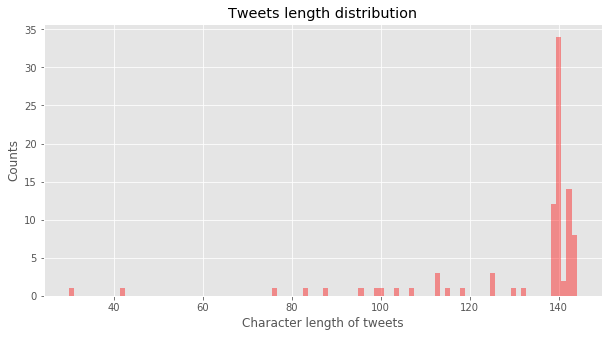

In [11]:
text_lens = data['Tweets'].apply(len).values
fig = plt.figure()
fig.set_size_inches(10, 5)
g = sns.distplot(text_lens, kde=False, bins=100, color='red')
g.set_xlabel('Character length of tweets')
g.set_ylabel('Counts')
g.set_title('Tweets length distribution')
plt.show()

In [16]:
data[text_lens == 144]

,Tweets
30,"RT @volcaniclastic: Ok science twitter, data v..."
33,"Ok science twitter, data viz nerds &amp; coaut..."
36,We created seasonal hands-on Dev Days...\r\n\r...
40,RT @Deep_In_Depth: The FDA Wants To Regulate M...
41,The FDA Wants To Regulate Machine Learning in ...
56,RT @RayFleming: How do we get students more in...
73,RT @SpirosMargaris: 19 Inspiring #Women \r\n\r...
74,RT @DataScienceNIG: Join the founder &amp; Lea...


In [18]:
(text_lens == 144).sum()

8

In [20]:
data[text_lens == 144].loc[30]

Tweets    RT @volcaniclastic: Ok science twitter, data v...
Name: 30, dtype: object

In [21]:
data[text_lens == 144].loc[74]

Tweets    RT @DataScienceNIG: Join the founder &amp; Lea...
Name: 74, dtype: object

In [23]:
data.sample(10)

,Tweets
29,https://t.co/JtyqRVmxc5\r\n\r\nCurso de Harvar...
22,RT @amonchecourt: Data Science Daily Newspaper...
2,RT @KirkDBorne: The 10 #DeepLearning Methods t...
30,"RT @volcaniclastic: Ok science twitter, data v..."
37,"Data science is different now. ""Don’t get into..."
42,RT @ModisFrance: [ Décryptage ] De la modélisa...
55,"Checking out ""32 Statistical Concepts Explaine..."
60,get 20% off use code DSS7wdata Join us 13 Jun!...
86,#AI Algorithms are Shockingly Good at Doing Sc...
21,RT @amonchecourt: Data Science Daily Newspaper...


In [5]:
# Remove the links from the tweets
import re
data['Tweets'] = data['Tweets'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [34]:
data.sample(10)

,Tweets
46,RT @THEAdamGabriel: HT KirkDBorne: The 10 #Dee...
89,今日から学校！Data scienceのお勉強してきます…！
33,"Ok science twitter, data viz nerds &amp; coaut..."
77,The 10 #DeepLearning Methods that #AI Practiti...
18,We all know that the demand for data scientist...
59,"Come to Data Science Salon New York on 13 Jun,..."
38,RT @SyrDataScience: Earn your Master's in Data...
68,RT @THEAdamGabriel: HT KirkDBorne: The 10 #Dee...
6,RT @DataFlairWS: 14 Most Used #DataScience Too...
88,@helsinkiuni @VesaAuvinen @MariPantsar @SitraF...


In [11]:
data.to_csv('data/tweets.csv', index=False)

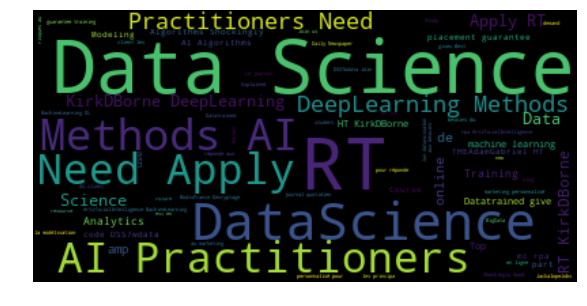

In [9]:
# Import
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Collate the tweets into a larger one
tweets_concat = " ".join(tweet for tweet in data.Tweets)

# I don't want stopwords to appear in the cloud
stopwords = set(STOPWORDS)

# Generate the cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(tweets_concat)

# Display the generated image
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()